Plots to explain the zero ecc amp and omega works as an average to the ecc amp and omega, respectively

In [1]:
import sys
sys.path.append("../../")

In [2]:
from measureEccentricity.measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform
from measureEccentricity.plot_settings import use_fancy_plotsettings, colorsDict, figWidthsOneColDict
import matplotlib.pyplot as plt
import numpy as np

/home1/md.shaikh/miniconda3/envs/seob/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/seob/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


### Create eccentric waveforms using seobnrv4ehm

In [3]:
from EccTests.TestEOBvsMeasuredEcc.seobnrv4ehm import get_modes
import lal

In [4]:
M = 50
EOBecc = 0.3
Momega0 = 0.017
MT = M * lal.MTSUN_SI
f_low = Momega0/np.pi/MT
f_low
q = 4
chi1 = -0.6
chi2=-0.6

In [5]:
tecc, hlmecc = get_modes(q=4, chi1=chi1, chi2=chi2, M_fed=M, eccentricity=EOBecc, f_min=f_low, physical_units=False, save=False)

In [6]:
Momega0_zeroecc = 0.01
MT = M * lal.MTSUN_SI
f_low_zeroecc = Momega0_zeroecc/np.pi/MT
f_low_zeroecc

12.92500116366214

In [7]:
tzeroecc, hlmzeroecc = get_modes(q=q, chi1=chi1, chi2=chi2, M_fed=M, eccentricity=0, f_min=f_low_zeroecc, physical_units=False, save=False)

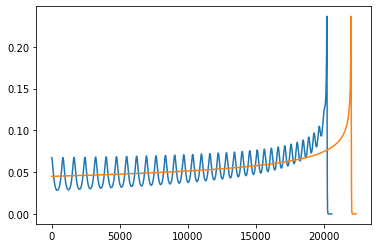

In [8]:
plt.plot(tecc, np.abs(hlmecc[(2, 2)]))
plt.plot(tzeroecc, np.abs(hlmzeroecc[(2, 2)]))

In [9]:
dataDict = {"t": tecc, "hlm": hlmecc, "t_zeroecc": tzeroecc, "hlm_zeroecc":hlmzeroecc}

In [10]:
tref_in = dataDict["t"]

In [11]:
journal = "APS"
use_fancy_plotsettings(journal=journal)

Text(0.5, 1.0, '$q=4.0$, $\\chi_{1z}=-0.6$, $\\chi_{2z}=-0.6$')

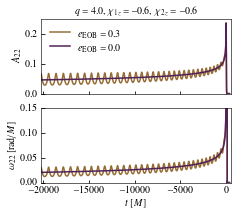

In [13]:
fig, ax = plt.subplots(nrows=2, figsize=(figWidthsOneColDict[journal], 3), sharex=True)
method = "ResidualAmplitude"
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=-15000,
                                                    dataDict=dataDict,
                                                    method=method,
                                                    return_ecc_method=True)
# plot amp22
ax[0].plot(eccMethod.t, eccMethod.amp22, label=rf"$e_{{\mathrm{{EOB}}}}={EOBecc:.1f}$", c=colorsDict["default"])
ax[0].plot(eccMethod.t, eccMethod.amp22_zeroecc_interp, label=r"$e_{{\mathrm{{EOB}}}}=0.0$", c=colorsDict["periastron"])
ax[0].set_ylim(0,)
ax[0].set_ylabel(r"$A_{22}$")
ax[0].legend()
ax[1].set_xlim(eccMethod.t[0], 500)

# plot omega22
ax[1].plot(eccMethod.t, eccMethod.omega22, c=colorsDict["default"])
ax[1].plot(eccMethod.t, eccMethod.omega22_zeroecc_interp, c=colorsDict["periastron"])
ax[1].set_ylim(0, 0.15)
ax[1].set_ylabel(r"$\omega_{22}$ [rad/$M$]")
ax[1].set_xlabel(r"$t$ [$M$]")
ax[0].set_title(rf"$q={q:.1f}$, $\chi_{{1z}}={chi1:.1f}$, $\chi_{{2z}}={chi2:.1f}$", fontsize=10, ha="center")
# ax[1].set_ylim(-8e-7, 8e-7)
# ax[1].set_ylim(-5.45e-7, 5.45e-7)
# ax[1].set_xlim(-20000, -5000)
# ax[1].axvline(-9500, c=colorsDict["vline"], ls="--")
# ax[1].legend(loc="upper right", handlelength=0.01, labelspacing=0.01, borderaxespad=0.00, columnspacing=1, frameon=False, ncol=1)
# xticks = np.arange(-20000, -4000, 3000)
# ax[1].set_xticks(xticks)
#ax.set_xlim(right=-2000)
#ax.set_ylim(0.019, 0.045)
#ax.set_xlabel(r"$t$ [$M$]")
#ax.set_ylabel(r"$\omega_{22}$ [rad/$M$]")

In [14]:
fig.subplots_adjust(left=0.15, bottom=0.13, right=0.98, top=0.91, hspace=0.12)
fig.savefig("../figs/ecc_and_zero_ecc.pdf")